# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Arpita Ravindranath
### ID : 5002702

## Student 2
### Name : Menno Bezema
### ID : 4248252

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

pandas
numpy
matplotlib
sklearn
yellowbrick

### index (Easy navigation to sections)
This index also shows how our report is set up. We work through the questions in the assignments in order. The link to the question is the first cell in which we talk about that part (2a leads to the start of 2a).
1. [Familiarization and discretization task](#1)
    - [1a. Plot Visualizations](#1a)
    - [1b. Discretize selected features](#1b)
    - [1c. Answers and explanation](#1c)
2. [Frequent task](#2)
    - [2a. Use the SPACE SAVING Algorithm](#2a)
    - [2b. Analysis and answers to the questions](#2b)
3. [Sketching task](#3)
    - [3a. COUNT-MIN sketch](#3a)
    - [3b. Analysis and answers to the questions](#3b)
4. [Min-wise locality sensitive hashing task  task](#4)
    - [4a. Implementation](#4a)
    - [4b. Analysis and answers to the questions](#4b)
5. [Random hyperplane locality sensitive hashing task ](#5)
    - [5a. Implementation - locality sensitive hashing](#5a)
    - [5b. Analysis and answers to the questions. Also provide relevant plots](#5b)
6. [Botnet profiling task](#6)
    - [6a. Learn a sequential model.](#6a)
    - [6b. Analysis and answers to the questions.](#6b)
7. [Botnet fingerprinting task task](#7)
    - [7a. Fingerprinting.](#7a)
    - [7b. Analysis and answers to the questions.](#7b)
8. [Bonus](#8)

<a id='1'></a>

## 1. Familiarization and discretization task – 1 A4
Familiarization and discretization task –1 A4
Consider scenario 10 from the CTU-13 data sets (see paper 4 from below resources). Remove all background flows from the data. 

	Assignment:
	1. You are to discretize the NetFlows (Apply the discretization to data from all hosts in the selected scenario). 
	2. Investigate the data from one of the infected hosts. 
	3. Select and visualize two features that you believe are most relevant for modeling the behavior of the infected host. (criteria: Shows the behavior of two features conditioned on the infection status.)
	4. Discretize these features using use any of the methods discussed in class (combine the two values into a single discrete value). (criteria: The discretization is sound, and the result investigated)
    
    Question:
	1. Do you observe any behavior in the two features that could be useful for detecting the infection? Explain and visualize. 


In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [18]:
import zipfile
archive = zipfile.ZipFile('dataset_lab3.zip', 'r')
new_data = pd.read_csv(archive.open('dataset_10/capture20110818.binetflow'))
# archive.namelist() capture20110818.binetflow.labeled
new_data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [17]:
# Reading the networkdata into a 
# archive = zipfile.ZipFile('capture20110818.binetflow.labeled.zip', 'r')
data = pd.read_csv('capture20110818.binetflow.labeled.zip', header=0, sep=',')
data.head()

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label(Normal:CC:Background),CCDetector(Normal:CC:Unknown)
0,2011/08/18 11:46:16.889182,2.991484,tcp,147.32.84.118,3038,->,2.215.205.93,6881,S_,0.0,NaN,2,124,124,flow=Background-TCP-Attempt,Unknown
1,2011/08/18 11:48:31.567539,8.933183,tcp,147.32.84.118,3168,->,2.215.205.93,6881,S_,0.0,NaN,3,186,186,flow=Background-TCP-Attempt,Unknown
2,2011/08/18 11:51:49.645845,9.010275,tcp,147.32.84.118,3312,->,2.215.205.93,6881,S_,0.0,NaN,3,186,186,flow=Background-TCP-Attempt,Unknown
3,2011/08/18 14:56:38.633552,0.000921,udp,46.217.68.251,20962,<->,147.32.86.116,19083,CON,0.0,0.0,2,136,75,flow=Background-UDP-Established,Unknown
4,2011/08/18 13:24:42.033424,2570.226318,udp,147.32.84.229,13363,<->,208.88.186.4,34033,CON,0.0,0.0,16,2241,1643,flow=Background-UDP-Established,Unknown


Find all entries that belong to the background flow by searching for the word background in the feature Label(Normal:CC:Background).When the data 'Label' feature is -1 then that flow does not belong to the background.This information will help to retrive non background flows in future.

In [22]:
sub = 'Background'
data['Label'] = new_data['Label'].str.find(sub)

In [24]:
#convert the Proto,Dir,State,Label(Normal:CC:Background),CCDetector(Normal:CC:Unknown) features to numeric
label_mapping = {}
char_cols = ['Proto', 'Dir','State','Label(Normal:CC:Background)','CCDetector(Normal:CC:Unknown)']
for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])
# label_mapping

{'Proto': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64'),
 'Dir': Int64Index([0, 1, 2, 3, 4, 5], dtype='int64'),
 'State': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             321, 322, 323, 324, 325, 326, 327, 328, 329, 330],
            dtype='int64', length=332),
 'Label(Normal:CC:Background)': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
            dtype='int64', length=111),
 'CCDetector(Normal:CC:Unknown)': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')}

In [5]:
#Remove all background flows
data_no_background = data[data['Label'] == -1]
#data_no_background

,#StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label(Normal:CC:Background),CCDetector(Normal:CC:Unknown),Label
14,2011/08/18 11:48:08.017588,245.990387,0,147.32.84.164,40223,0,74.125.232.218,80,3,0.0,0.0,33,11785,1553,4,0,-1
15,2011/08/18 11:48:08.017596,15.977654,0,147.32.84.164,40224,0,74.125.232.218,80,4,0.0,0.0,6,412,272,4,0,-1
16,2011/08/18 11:48:09.476772,244.530823,0,147.32.84.164,40239,0,74.125.232.218,80,3,0.0,0.0,28,5899,2885,4,0,-1
17,2011/08/18 12:11:49.414857,249.324158,0,147.32.84.164,39306,0,74.125.232.218,80,3,0.0,0.0,21,3617,2130,4,0,-1
57,2011/08/18 12:19:01.940628,928.010437,2,147.32.84.207,0x0008,0,147.32.96.69,0x0045,5,0.0,NaN,38,40508,40508,8,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309564,2011/08/18 12:18:35.891076,947.139954,2,147.32.84.207,0x0008,0,147.32.96.69,0x0071,5,0.0,NaN,30,31980,31980,8,0,-1
1309565,2011/08/18 14:43:51.918918,365.100403,2,147.32.84.207,0x0008,0,147.32.96.69,0x0071,5,0.0,NaN,12,12792,12792,8,0,-1
1309587,2011/08/18 12:18:33.695367,990.694092,2,147.32.84.193,0x0008,0,147.32.96.69,0x0067,5,0.0,NaN,44,46904,46904,32,0,-1
1309588,2011/08/18 14:43:53.224548,202.749191,2,147.32.84.193,0x0008,0,147.32.96.69,0x0067,5,0.0,NaN,6,6396,6396,32,0,-1


In [6]:
#We obtain this information from the description of the CTU13 dataset
infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206''147.32.84.207','147.32.84.208','147.32.84.209']

normal_hosts = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36, 147.32.80.9', '147.32.87.11']

In [7]:
#getting flows related to infected host 147.32.84.165(This is the infected host chosen for visualization and discretization)
#We choose all flows where the source or destination IP is 147.32.84.165
infected1 = data_no_background[data_no_background['SrcAddr'] == infected_hosts[0]]
infected2 = data_no_background[data_no_background['DstAddr'] == infected_hosts[0]]
frames = [infected1,infected2]
infected = pd.concat(frames)
#infected

,#StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label(Normal:CC:Background),CCDetector(Normal:CC:Unknown),Label
3635,2011/08/18 12:18:35.558911,997.382690,2,147.32.84.165,0x0008,0,147.32.96.69,0x0008,5,0.0,NaN,37,39442,39442,24,0,-1
3636,2011/08/18 14:43:52.726282,1256.579956,2,147.32.84.165,0x0008,0,147.32.96.69,0x0008,5,0.0,NaN,14,14924,14924,24,0,-1
6579,2011/08/18 13:47:11.934378,0.052506,0,147.32.84.165,1028,0,74.125.232.197,80,16,0.0,0.0,7,882,629,31,0,-1
10985,2011/08/18 12:19:36.953336,911.180969,2,147.32.84.165,0x0008,0,147.32.96.69,0x0017,5,0.0,NaN,30,31980,31980,24,0,-1
10986,2011/08/18 14:43:52.563631,1230.802002,2,147.32.84.165,0x0008,0,147.32.96.69,0x0017,5,0.0,NaN,15,15990,15990,24,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300500,2011/08/18 15:04:37.078618,0.000000,2,147.32.84.165,0x241c,0,147.32.96.69,NaN,138,0.0,NaN,1,1066,1066,24,0,-1
1300501,2011/08/18 15:04:48.735146,0.000000,2,147.32.84.165,0x6d17,0,147.32.96.69,NaN,138,0.0,NaN,1,1066,1066,24,0,-1
1300502,2011/08/18 15:04:52.487504,0.000000,2,147.32.84.165,0x316b,0,147.32.96.69,NaN,136,0.0,NaN,1,1066,1066,24,0,-1
1300503,2011/08/18 15:04:44.354384,0.000000,2,147.32.84.165,0xc49d,0,147.32.96.69,NaN,136,0.0,NaN,1,1066,1066,24,0,-1


In [8]:
#getting non infected flows.This is when the source IP or destination IP belong to the list of normal hosts
normal1 = data_no_background[data_no_background['SrcAddr'].isin(normal_hosts)]
normal2 = data_no_background[data_no_background['DstAddr'].isin(normal_hosts)]
frames = [normal1,normal2]
normal = pd.concat(frames)
#normal

,#StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label(Normal:CC:Background),CCDetector(Normal:CC:Unknown),Label
14,2011/08/18 11:48:08.017588,245.990387,0,147.32.84.164,40223,0,74.125.232.218,80,3,0.0,0.0,33,11785,1553,4,0,-1
15,2011/08/18 11:48:08.017596,15.977654,0,147.32.84.164,40224,0,74.125.232.218,80,4,0.0,0.0,6,412,272,4,0,-1
16,2011/08/18 11:48:09.476772,244.530823,0,147.32.84.164,40239,0,74.125.232.218,80,3,0.0,0.0,28,5899,2885,4,0,-1
17,2011/08/18 12:11:49.414857,249.324158,0,147.32.84.164,39306,0,74.125.232.218,80,3,0.0,0.0,21,3617,2130,4,0,-1
3138,2011/08/18 10:22:00.042929,0.312377,0,147.32.84.170,53856,0,199.7.59.72,80,9,0.0,0.0,12,2614,798,21,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303285,2011/08/18 12:10:11.524072,370.053680,0,147.32.84.134,59408,0,80.239.149.19,443,25,0.0,0.0,63,23090,5742,40,0,-1
1303286,2011/08/18 12:10:11.524120,697.992126,0,147.32.84.134,59409,0,80.239.149.19,443,23,0.0,0.0,90,33921,9101,40,0,-1
1303287,2011/08/18 12:34:14.703133,306.979614,0,147.32.84.134,59009,0,80.239.149.19,443,9,0.0,0.0,35,7695,2630,40,0,-1
1303288,2011/08/18 12:40:55.473423,476.248322,0,147.32.84.134,42022,0,80.239.149.19,443,9,0.0,0.0,60,19151,4376,40,0,-1


In [9]:
#Print variation in the features to find the ones with the most deviations
print("infected - mean Totpackets", np.mean(infected['TotPkts']), np.std(infected['TotPkts']))
print("normal   - mean Totpackets", np.mean(normal['TotPkts']), np.std(normal['TotPkts']))

print("infected - mean TotBytes  ", np.mean(infected['TotBytes']), np.std(infected['TotBytes']))
print("normal   - mean TotBytes  ", np.mean(normal['TotBytes']), np.std(normal['TotBytes']))

print("infected - mean SrcBytes  ", np.mean(infected['SrcBytes']), np.std(infected['SrcBytes']))
print("normal   - mean SrcBytes  ", np.mean(normal['SrcBytes']), np.std(normal['SrcBytes']))

print("infected - mean dTos      ", np.mean(infected['dTos']), np.std(infected['dTos']))
print("normal   - mean dTos      ", np.mean(normal['dTos']), np.std(normal['dTos']))

print("infected - mean sTos      ", np.mean(infected['sTos']), np.std(infected['sTos']))
print("normal   - mean sTos      ", np.mean(normal['sTos']), np.std(normal['sTos']))

print("infected - mean Proto     ", np.mean(infected['Proto']), np.std(infected['Proto']))
print("normal   - mean Proto     ", np.mean(normal['Proto']), np.std(normal['Proto']))

print("infected - mean State     ", np.mean(infected['State']), np.std(infected['State']))
print("normal   - mean State     ", np.mean(normal['State']), np.std(normal['State']))

print("infected - mean Dur       ", np.mean(infected['Dur']), np.std(infected['Dur']))
print("normal   - mean Dur       ", np.mean(normal['Dur']), np.std(normal['Dur']))

print("infected - mean Dir       ", np.mean(infected['Dir']), np.std(infected['Dir']))
print("normal   - mean Dir       ", np.mean(normal['Dir']), np.std(normal['Dir']))

print("infected - mean CCDetector", np.mean(infected['CCDetector(Normal:CC:Unknown)']), np.std(infected['CCDetector(Normal:CC:Unknown)']))
print("normal   - mean CCDetector", np.mean(normal['CCDetector(Normal:CC:Unknown)']), np.std(normal['CCDetector(Normal:CC:Unknown)']))

print("infected - mean Label     ", np.mean(infected['Label(Normal:CC:Background)']), np.std(infected['Label(Normal:CC:Background)']))
print("normal   - mean Label     ", np.mean(normal['Label(Normal:CC:Background)']), np.std(normal['Label(Normal:CC:Background)']))

infected - mean Totpackets 32.89696210460382 1833.7146960534685
normal   - mean Totpackets 37.226810293237584 518.854077415394
infected - mean TotBytes   29293.764484810523 1461313.1540915435
normal   - mean TotBytes   28335.471706895405 481827.83026916196
infected - mean SrcBytes   29282.68159515607 1461313.238340761
normal   - mean SrcBytes   1723.304275550236 18867.270679993308
infected - mean dTos       0.0 0.0
normal   - mean dTos       0.0 0.0
infected - mean sTos       0.0 0.0
normal   - mean sTos       0.0 0.0
infected - mean Proto      1.9945714583985803 0.08652729715778576
normal   - mean Proto      0.6957909435467784 0.5583955080129549
infected - mean State      127.71855099697254 35.16060301432401
normal   - mean State      5.044550834496975 15.277228797290448
infected - mean Dur        100.24288123415799 311.22619066773177
normal   - mean Dur        39.7904124645921 258.6656079930234
infected - mean Dir        0.0018791105543376136 0.04330796113720387
normal   - mean Dir  

Text(0, 0.5, 'Mean value')

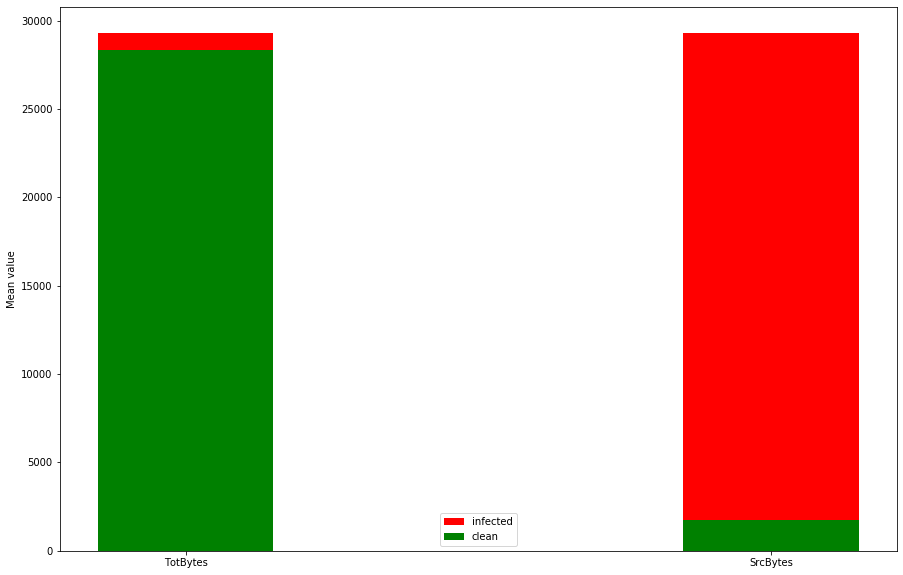

In [10]:
cols = ['TotBytes','SrcBytes','TotPkts', 'Dur','State', 'dTos','sTos', 'Proto', 'Dir','CCDetector(Normal:CC:Unknown)','Label(Normal:CC:Background)']

mean_infected = np.mean(infected[cols].values, axis=0)
std_infected = np.std(infected[cols].values, axis=0)

mean_clean = np.mean(normal[cols].values, axis=0)
std_clean = np.std(normal[cols].values, axis=0)


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(2), height=mean_infected[:-9], width=0.3, color='r', label='infected')
ax.bar(range(2), height=mean_clean[:-9], width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(2)) 
ax.set_xticklabels(cols[:-9], fontsize=10)
ax.set_ylabel('Mean value')

Text(0, 0.5, 'Mean value')

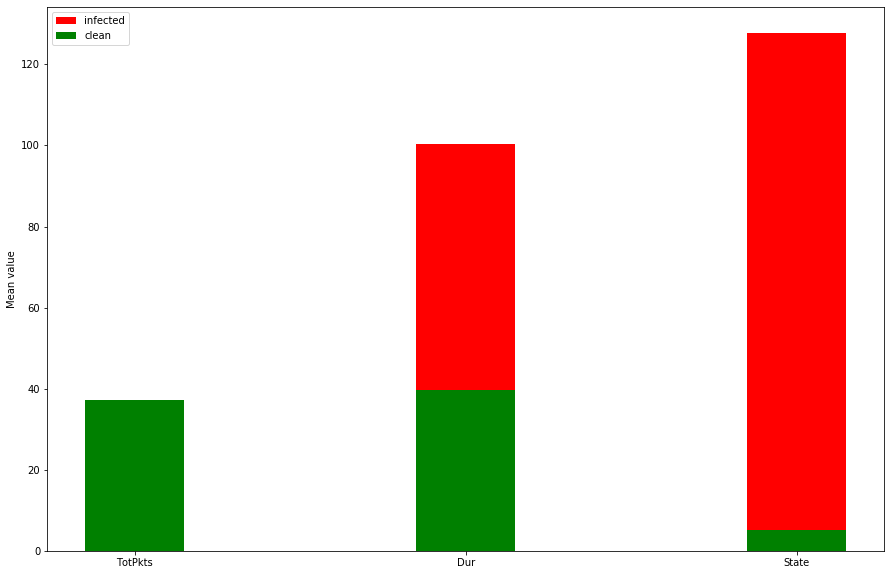

In [11]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(3),height=mean_infected[-9:-6],
          width=0.3, color='r', label='infected')
ax.bar(range(3), height=mean_clean[-9:-6], 
          width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(3)) 
ax.set_xticklabels(cols[-9:-6], fontsize=10)
ax.set_ylabel('Mean value')

Text(0, 0.5, 'Mean value')

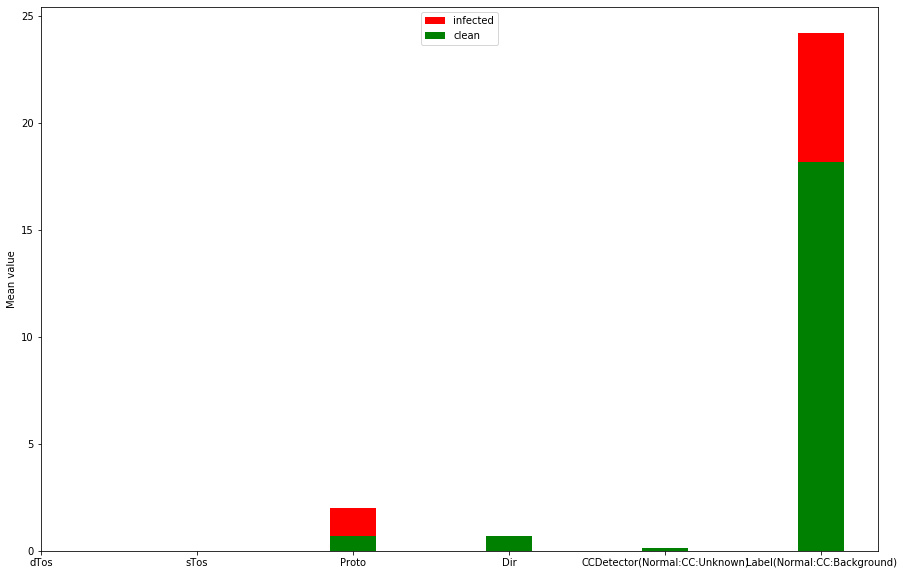

In [12]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(6),height=mean_infected[-6:],
          width=0.3, color='r', label='infected')
ax.bar(range(6), height=mean_clean[-6:], 
          width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(6)) 
ax.set_xticklabels(cols[-6:], fontsize=10)
ax.set_ylabel('Mean value')

<a id='1a'></a>

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.
    
       Select and visualize two features that you believe are most relevant for modeling the behavior of the infected host. (criteria: Shows the behavior of two features conditioned on the infection status.)

From the above plots we see that Proto,SrcBytes,TotBytes,TotPkts and State seem to be the most important features.We further choose Proto and TotPkts as they vary largely between the clean and the infected flows



In [4]:
#Visualising these two features

plt.figure(figsize=(10,10))
plt.scatter(normal['Proto'].values-0.02, normal['TotPkts'].values, color='g', label='normal')
plt.scatter(infected['Proto'].values+0.02,infected['TotPkts'].values, color='r', label='infected')
plt.xlabel('Proto')
plt.ylabel('TotPkts')
plt.title('Protocol used by Infected vs Normal machines')
plt.xticks(range(6), ['TCP', 'UDP', 'ICMP','RTCP','RTP','ARP'])  #we get this from the mapping performed earlier
plt.legend()

NameError: name 'normal' is not defined

<Figure size 720x720 with 0 Axes>

<a id='1b'></a>

### 1b. Discretize selected features
    Discretize these features using use any of the methods discussed in class (combine the two values into a single discrete value). (criteria: The discretization is sound, and the result investigated)

In [ ]:
# Run the following command if yellowbrick is not installed
# %pip install yellowbrick

C:\Users\maila\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


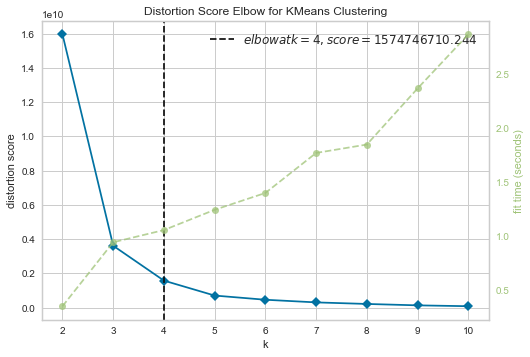

In [14]:
#Apllying Elbow method to find optimal number of clusters
val = data_no_background['TotPkts'].values
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KElbowVisualizer(KMeans(),k=10)
model.fit(val[...,np.newaxis])
model.show()

As the breakpoint is at cluster 4.Based on this we calculate the ordinal rank

We disctretize the TotPkts feature,the Protocol feature is aldready discrete in nature. We add a new feature 'Discrete_TotPkts' which corresponds to the discretized TotPkts featutre.Then we combine these two - Protocol and discretized TotPkts feature.For this step we make use of the algorithm mentioned in paper 4(Learning Behavioral Fingerprints From NetflowsUsing Timed Automata) on page 311.We Then looked into the possible differences that could be exploited in the extracted codes.

In [15]:
def discretize(val, ranks):

    ordinal_ranks = np.linspace(0, 1, ranks, endpoint=False) #based on ranks splitting to percentiles
    ordinal_ind = np.ceil(ordinal_ranks[1:] * len(val)) #leave out 0 and calculate p/100*N and round it off,the ordinal ranks
    ordinal_val = np.array(sorted(val))[ordinal_ind.astype(int)] #select the values at the percentiles for mapping
    disc = []
    for v in val:
        for i in range(len(ordinal_val)): #i takes values 0,1,2
            if v<=ordinal_val[i]:  #check val against all the ordinal boundary values
                disc.append(i)
                break
            if i==len(ordinal_val)-1:  #if its not lesser than any boundary then it is put into the last category
                disc.append(i+1)
    return np.array(disc)  #this contains the discretized values of the feature


def extract_code(values):
    M = np.zeros(values.shape[1])
    for j in range(values.shape[1]):
        M[j] = len(np.unique(values[:,j])) #Pull sout all rows and only jth column,M is an array consisting of no of unique value for each feature
    spacesize = np.prod(M) #its the product of the no of values for each feature
    code = np.zeros(values.shape[0], dtype=int)
    for i in range(values.shape[0]):
        s = spacesize
        for j in range(values.shape[1]):
            code[i] += values[i,j] * s/M[j]
            s = s / M[j]
    return code

To visualize the difference we make use of the normal flow data from the first normal host and compare it to the infected host data.

In [16]:
TotPkts_disc = discretize(val, 3)
data_no_background['Discrete_TotPkts'] = TotPkts_disc

feat = ['Proto', 'Discrete_TotPkts']

infected_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==infected_hosts[0], data_no_background['DstAddr']==infected_hosts[0])]
infected_data = infected_data[feat].values #selects values of Proto and Discrete_Totpkts
infected_code = extract_code(infected_data)

clean_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==normal_hosts[0], data_no_background['DstAddr']==normal_hosts[0])][feat].values
test_code= extract_code(clean_data)

C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Extracted code')

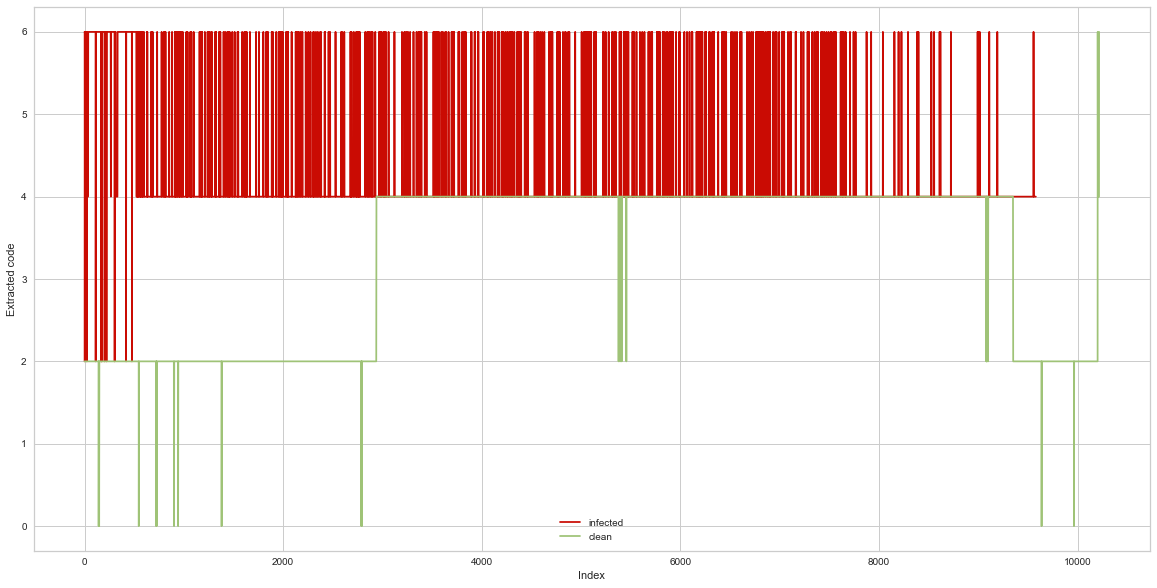

In [17]:
plt.figure(figsize=(20,10))
plt.plot(infected_code, color='r', label='infected')
plt.plot(test_code, color='g', label='clean')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Extracted code")

<a id='1c'></a>

### 1b. Answers and explanation
Do you observe any behavior in the two features that could be useful for detecting the infection? Explain and visualize.

As seen in the above plots the infected data resulted in higher extracted code values, hence this could be used in classification of unseen data as infected or normal data. (This can further be used in task 5/6???)

In [11]:
import zipfile
archive = zipfile.ZipFile('dataset_lab3.zip', 'r')
data = archive.read('dataset_10/capture20110818.binetflow')
# archive.namelist()

<a id='2'></a>

## 2. Frequent task – 1/2 A4 (Individual)

Use the SPACE SAVING algorithm to estimate the distribution over 3-grams of discretised symbols. 

	1. Write code for the algorithm, use it to estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2. Use a range of number of counters. (criteria: explanations for the number of used counters/bin)
	3. What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4. Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)

<a id='2a'></a>

### 2a. Use the SPACE SAVING algorithm

    1. Write code for the algorithm, use it to estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2. Use a range of number of counters. (criteria: explanations for the number of used counters/bin)

<a id='2b'></a>

### 2b. Analysis and answers to the questions

    3. What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4. Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


<a id='3'></a>

## 3. Sketching task – 1/2 A4 (Individual)
Build code for computing a COUNT-MIN sketch to estimate occurrence counts for the 3-grams. Make sure the hash functions are pairwise independent. 

	1. Estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2.	Play with different heights and widths for the COUNT-MIN sketch matrix. (criteria: explanations for the number of used counters/bin) 
	3.	What are the 10 most frequent 3-gramsand their frequencies when approximated? 
	4.	Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


<a id='3a'></a>

### 3a. COUNT-MIN sketch

    1. Estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2.	Play with different heights and widths for the COUNT-MIN sketch matrix. (criteria: explanations for the number of used counters/bin) 

<a id='3b'></a>

### 3b. Analysis and answers to the questions

    3.	What are the 10 most frequent 3-gramsand their frequencies when approximated? 
	4.	Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


<a id='4'></a>

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual)

Implement min-wise locality sensitive hashing as explained in the slides and the documents on Brightspace. This can be used to quickly compute the Jaccard distance for N-gram profiles. 

	1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are binary, an N-gram (subsequence) exists (a 1 in the table) or does not (a 0 in the table). 
	3.	Use min-wise LSH to map the 3-gram profiles to a small set of bins of your choice. (Criteria: The number of bins is set sensibly)
	4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

<a id='4a'></a>

### 4a. Implementation
    1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are binary, an N-gram (subsequence) exists (a 1 in the table) or does not (a 0 in the table). 
	3.	Use min-wise LSH to map the 3-gram profiles to a small set of bins of your choice. (Criteria: The number of bins is set sensibly)

<a id='4b'></a>

### 4b. Analysis and answers to the questions
    
    4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

<a id='5'></a>

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual)

Implement locality sensitive hashing using random hyperplanes as explained in the slides and the documents on Brightspace. This can be used to quickly compute Euclidean distance for N-gram profiles.

	1.	Use the discretization from task 1, build 3-gram profilesfor every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are countsfor every possible 3-gram (subsequence).
	3.	Use random hyperplanes LSH to map the N-gram profiles to a small set of bins of your choice. 
	4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. (criteria: The number of bins is set sensibly)
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)


<a id='5a'></a>

### 5a. Implementation - locality sensitive hashing

    1.	Use the discretization from task 1, build 3-gram profilesfor every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are countsfor every possible 3-gram (subsequence).
	3.	Use random hyperplanes LSH to map the N-gram profiles to a small set of bins of your choice. 

<a id='5b'></a>

### 5b. Analysis and answers to the questions. Also provide relevant plots.

    4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. (criteria: The number of bins is set sensibly)
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

<a id='6'></a>

## 6.Botnet profiling task – 1/2 A4

    1.	Use a sliding window to obtain sequence data for every host in all scenarios considered in paper 4 (with multiple infected hosts), with a length of your choice. (criteria: Advanced sequential model learning is used correctly, one for each host.)
	2.	Learn an n-gram model from the data of one infected host and match its profile (e.g., n-grams using cosine distance, or probabilities using KL-divergence) with all other hosts from the same scenario. 
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4) (criteria: Profile matching and evaluation are correct)


<a id='6a'></a>

### 6a. Learn a sequential model

    1.	Use a sliding window to obtain sequence data for every host in all scenarios considered in paper 4 (with multiple infected hosts), with a length of your choice. (criteria: Advanced sequential model learning is used correctly, one for each host.)
	2.	Learn an n-gram model from the data of one infected host and match its profile (e.g., n-grams using cosine distance, or probabilities using KL-divergence) with all other hosts from the same scenario. 

<a id='6b'></a>

### 6b. Analysis and answers to the questions.

    3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4) (criteria: Profile matching and evaluation are correct)


<a id='7'></a>

## 7.Botnet fingerprinting task – 1/2 A4

    1.	Use the obtained botnet profiles for fingerprinting, i.e., look for the occurrence of an n-gram that does not occur in any benign traffic. 
	2.	Whenever this subsequence occurs, you raise an alarm. 
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4).
	4.	Compare it to profiling and explain the results. (criteria:Fingerprinting is correctly applied. Comparison to profiling is sound and considers both run-time and the kinds of behaviors that can be detected)

<a id='7a'></a>

### 7a. Fingerprinting

    1.	Use the obtained botnet profiles for fingerprinting, i.e., look for the occurrence of an n-gram that does not occur in any benign traffic. 
	2.	Whenever this subsequence occurs, you raise an alarm. 


<a id='7b'></a>

### 7b. Analysis and answers to the questions.
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4).
	4.	Compare it to profiling and explain the results. (criteria:Fingerprinting is correctly applied. Comparison to profiling is sound and considers both run-time and the kinds of behaviors that can be detected)

<a id='8'></a>

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.